# Data Pre-Processing

### Importing all of the libraries needed

In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
import sklearn
from sklearn import preprocessing

sns.set()

In [74]:
import matplotlib
print("Pandas Version: ", pd.__version__)
print("NumPy Version: ", np.__version__)
print("Matplotlib Version: ", matplotlib.__version__)
print("Seaborn Version: ", sns.__version__)
print("Scikit-Learn Version: ", sklearn.__version__)

Pandas Version:  2.1.3
NumPy Version:  1.26.2
Matplotlib Version:  3.8.2
Seaborn Version:  0.13.0
Scikit-Learn Version:  1.3.2


## Understanding the Data Type and Data Type Cleaning

In [242]:
dataset = pd.read_csv("Melbourne_housing_FULL.csv")
print(dataset.shape)
dataset.head(10)

(34857, 21)


,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0
5,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra City Council,-37.7969,144.9969,Northern Metropolitan,4019.0
6,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra City Council,-37.8072,144.9941,Northern Metropolitan,4019.0
7,Abbotsford,16 Maugie St,4,h,NaN,SN,Nelson,6/08/2016,2.5,3067.0,...,2.0,2.0,400.0,220.0,2006.0,Yarra City Council,-37.7965,144.9965,Northern Metropolitan,4019.0
8,Abbotsford,53 Turner St,2,h,NaN,S,Biggin,6/08/2016,2.5,3067.0,...,1.0,2.0,201.0,NaN,1900.0,Yarra City Council,-37.7995,144.9974,Northern Metropolitan,4019.0
9,Abbotsford,99 Turner St,2,h,NaN,S,Collins,6/08/2016,2.5,3067.0,...,2.0,1.0,202.0,NaN,1900.0,Yarra City Council,-37.7996,144.9989,Northern Metropolitan,4019.0


In [243]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         34857 non-null  object 
 1   Address        34857 non-null  object 
 2   Rooms          34857 non-null  int64  
 3   Type           34857 non-null  object 
 4   Price          27247 non-null  float64
 5   Method         34857 non-null  object 
 6   SellerG        34857 non-null  object 
 7   Date           34857 non-null  object 
 8   Distance       34856 non-null  float64
 9   Postcode       34856 non-null  float64
 10  Bedroom2       26640 non-null  float64
 11  Bathroom       26631 non-null  float64
 12  Car            26129 non-null  float64
 13  Landsize       23047 non-null  float64
 14  BuildingArea   13742 non-null  float64
 15  YearBuilt      15551 non-null  float64
 16  CouncilArea    34854 non-null  object 
 17  Lattitude      26881 non-null  float64
 18  Longti

### Variable Types (1)
- Categorical Variables

In [244]:
# Identifying object column and converting it to categorical variable
print(dataset.select_dtypes(["object"]).columns)

categorical = [
    "Suburb",
    "Address",
    "Type",
    "Method",
    "SellerG",
    "Date",
    "CouncilArea",
    "Regionname",
]

for cat_variables in categorical:
    dataset[cat_variables] = dataset[cat_variables].astype('category')

Index(['Suburb', 'Address', 'Type', 'Method', 'SellerG', 'Date', 'CouncilArea',
       'Regionname'],
      dtype='object')


In [245]:
# Convert data column to date object
dataset['Date'] = pd.to_datetime(dataset['Date'], dayfirst=True)
dataset['Date'].head(5)

0   2016-09-03
1   2016-12-03
2   2016-02-04
3   2016-02-04
4   2017-03-04
Name: Date, dtype: category
Categories (78, datetime64[ns]): [2017-07-01, 2018-02-10, 2018-03-10, 2016-09-10, ..., 2017-07-08, 2016-10-08, 2017-09-09, 2017-12-09]

In [246]:
# Since postal code can be converted as categorical data type, thus
postal = ['Postcode']

for postcode in postal:
    dataset[postcode] = dataset[postcode].astype('category')

### Variable Types (2)
- Numerical Variables

In [247]:
dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Rooms,34857.0,3.031012e+00,0.969933,1.00000,2.00000,3.0000,4.000000e+00,1.600000e+01
Price,27247.0,1.050173e+06,641467.130105,85000.00000,635000.00000,870000.0000,1.295000e+06,1.120000e+07
Distance,34856.0,1.118493e+01,6.788892,0.00000,6.40000,10.3000,1.400000e+01,4.810000e+01
Bedroom2,26640.0,3.084647e+00,0.980690,0.00000,2.00000,3.0000,4.000000e+00,3.000000e+01
Bathroom,26631.0,1.624798e+00,0.724212,0.00000,1.00000,2.0000,2.000000e+00,1.200000e+01
Car,26129.0,1.728845e+00,1.010771,0.00000,1.00000,2.0000,2.000000e+00,2.600000e+01
Landsize,23047.0,5.935990e+02,3398.841946,0.00000,224.00000,521.0000,6.700000e+02,4.330140e+05
BuildingArea,13742.0,1.602564e+02,401.267060,0.00000,102.00000,136.0000,1.880000e+02,4.451500e+04
YearBuilt,15551.0,1.965290e+03,37.328178,1196.00000,1940.00000,1970.0000,2.000000e+03,2.106000e+03
Lattitude,26881.0,-3.781063e+01,0.090279,-38.19043,-37.86295,-37.8076,-3.775410e+01,-3.739020e+01


### Data Type Cleaning Result

In [248]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Suburb         34857 non-null  category
 1   Address        34857 non-null  category
 2   Rooms          34857 non-null  int64   
 3   Type           34857 non-null  category
 4   Price          27247 non-null  float64 
 5   Method         34857 non-null  category
 6   SellerG        34857 non-null  category
 7   Date           34857 non-null  category
 8   Distance       34856 non-null  float64 
 9   Postcode       34856 non-null  category
 10  Bedroom2       26640 non-null  float64 
 11  Bathroom       26631 non-null  float64 
 12  Car            26129 non-null  float64 
 13  Landsize       23047 non-null  float64 
 14  BuildingArea   13742 non-null  float64 
 15  YearBuilt      15551 non-null  float64 
 16  CouncilArea    34854 non-null  category
 17  Lattitude      26881 non-null  

## Data Cleaning

In data cleaning, we could use several methods to handle missing value, noisy, data, etc.

### Duplicate Columns

As you can see there are two columns that looked similar, which leads to ambiguity. Thus, I will check the `Rooms` and `Bedroom2` columns, whether it has a significance diffierence or not.

In [249]:
dataset['Duplicate Columns'] = dataset['Rooms'] - dataset['Bedroom2']
print("Rooms VS Bedroom2 (Average): ", dataset['Duplicate Columns'].mean())
print("Rooms VS Bedroom2 (Median): ", dataset['Duplicate Columns'].median())
dataset.head(10)

Rooms VS Bedroom2 (Average):  0.016253753753753753
Rooms VS Bedroom2 (Median):  0.0


,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,Duplicate Columns
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,2016-09-03,2.5,3067.0,...,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0,0.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,2016-12-03,2.5,3067.0,...,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0,0.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,2016-02-04,2.5,3067.0,...,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0,0.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,2016-02-04,2.5,3067.0,...,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0,0.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,2017-03-04,2.5,3067.0,...,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0,0.0
5,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,2017-03-04,2.5,3067.0,...,1.0,94.0,NaN,NaN,Yarra City Council,-37.7969,144.9969,Northern Metropolitan,4019.0,0.0
6,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,2016-06-04,2.5,3067.0,...,2.0,120.0,142.0,2014.0,Yarra City Council,-37.8072,144.9941,Northern Metropolitan,4019.0,1.0
7,Abbotsford,16 Maugie St,4,h,NaN,SN,Nelson,2016-08-06,2.5,3067.0,...,2.0,400.0,220.0,2006.0,Yarra City Council,-37.7965,144.9965,Northern Metropolitan,4019.0,1.0
8,Abbotsford,53 Turner St,2,h,NaN,S,Biggin,2016-08-06,2.5,3067.0,...,2.0,201.0,NaN,1900.0,Yarra City Council,-37.7995,144.9974,Northern Metropolitan,4019.0,-2.0
9,Abbotsford,99 Turner St,2,h,NaN,S,Collins,2016-08-06,2.5,3067.0,...,1.0,202.0,NaN,1900.0,Yarra City Council,-37.7996,144.9989,Northern Metropolitan,4019.0,-1.0


The result shows that there's no significance difference between these two, thus I will use the `Rooms` column instead

In [250]:
dataset = dataset.drop(['Bedroom2', 'Duplicate Columns'], axis=1)

In [251]:
dataset.head(3)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,2016-09-03,2.5,3067.0,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,2016-12-03,2.5,3067.0,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,2016-02-04,2.5,3067.0,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0


### Missing Values

In [252]:
# Summary of missing values
dataset.isnull().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Price             7610
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bathroom          8226
Car               8728
Landsize         11810
BuildingArea     21115
YearBuilt        19306
CouncilArea          3
Lattitude         7976
Longtitude        7976
Regionname           3
Propertycount        3
dtype: int64

In [253]:
# Average of missing values
dataset.isnull().sum()/len(dataset)*100

Suburb            0.000000
Address           0.000000
Rooms             0.000000
Type              0.000000
Price            21.832057
Method            0.000000
SellerG           0.000000
Date              0.000000
Distance          0.002869
Postcode          0.002869
Bathroom         23.599277
Car              25.039447
Landsize         33.881286
BuildingArea     60.576068
YearBuilt        55.386293
CouncilArea       0.008607
Lattitude        22.882061
Longtitude       22.882061
Regionname        0.008607
Propertycount     0.008607
dtype: float64

It's shown that there are significant missing values for these columns: `Price`, `Bathroom`, `Car`, `Landsize`, `BuildingArea`, `YearBuilt`, `Lattitude`, and `Longtitude`

To make this analysis more comprehensive, we will fill the missing values with a measure of Central Tendency (Median), with exception for `Car`, `Lattitude`, and `Longtitude` which will be replaced with '0'

In [254]:
# Price NaN Values
print("Price")
print("Number of null values before replacement: ", dataset['Price'].isnull().sum())
dataset['Price'].fillna(dataset['Price'].median(), inplace=True)
print("Number of null values after replacement: ", dataset['Price'].isnull().sum())
print(dataset['Price'].head())
print("--------------------------------\n")

# Bathroom NaN Values
print("Bathroom")
print("Number of null values before replacement: ", dataset['Bathroom'].isnull().sum())
dataset['Bathroom'].fillna(dataset['Bathroom'].median(), inplace=True)
print("Number of null values after replacement: ", dataset['Bathroom'].isnull().sum())
print(dataset['Bathroom'].head())
print("--------------------------------\n")

# Car NaN Values
print("Car")
print("Number of null values before replacement: ", dataset['Car'].isnull().sum())
dataset['Car'].fillna(0, inplace=True)
print("Number of null values after replacement: ", dataset['Car'].isnull().sum())
print(dataset['Car'].head())
print("--------------------------------\n")

# Landsize NaN Values
print("Landsize")
print("Number of null values before replacement: ", dataset['Landsize'].isnull().sum())
dataset['Landsize'].fillna(dataset['Landsize'].median(), inplace=True)
print("Number of null values after replacement: ", dataset['Landsize'].isnull().sum())
print(dataset['Landsize'].head())
print("--------------------------------\n")

# Building Area NaN Values
print("Building Area")
print("Number of null values before replacement: ", dataset['BuildingArea'].isnull().sum())
dataset['BuildingArea'].fillna(dataset['BuildingArea'].median(), inplace=True)
print("Number of null values after replacement: ", dataset['BuildingArea'].isnull().sum())
print(dataset['BuildingArea'].head())
print("--------------------------------\n")

# YearBuilt Area NaN Values
print("Year Built")
print("Number of null values before replacement: ", dataset['YearBuilt'].isnull().sum())
dataset['YearBuilt'].fillna(dataset['YearBuilt'].median(), inplace=True)
print("Number of null values after replacement: ", dataset['YearBuilt'].isnull().sum())
print(dataset['YearBuilt'].head())
print("--------------------------------\n")

# Lattitude NaN Values
print("Lattitude")
print("Number of null values before replacement: ", dataset['Lattitude'].isnull().sum())
dataset['Lattitude'].fillna(0, inplace=True)
print("Number of null values after replacement: ", dataset['Lattitude'].isnull().sum())
print(dataset['Lattitude'].head())
print("--------------------------------\n")

# Longtitude NaN Values
print("Longtitude")
print("Number of null values before replacement: ", dataset['Longtitude'].isnull().sum())
dataset['Longtitude'].fillna(0, inplace=True)
print("Number of null values after replacement: ", dataset['Longtitude'].isnull().sum())
print(dataset['Longtitude'].head())
print("--------------------------------\n")

Price
Number of null values before replacement:  7610
Number of null values after replacement:  0
0     870000.0
1    1480000.0
2    1035000.0
3     870000.0
4    1465000.0
Name: Price, dtype: float64
--------------------------------

Bathroom
Number of null values before replacement:  8226
Number of null values after replacement:  0
0    1.0
1    1.0
2    1.0
3    2.0
4    2.0
Name: Bathroom, dtype: float64
--------------------------------

Car
Number of null values before replacement:  8728
Number of null values after replacement:  0
0    1.0
1    1.0
2    0.0
3    1.0
4    0.0
Name: Car, dtype: float64
--------------------------------

Landsize
Number of null values before replacement:  11810
Number of null values after replacement:  0
0    126.0
1    202.0
2    156.0
3      0.0
4    134.0
Name: Landsize, dtype: float64
--------------------------------

Building Area
Number of null values before replacement:  21115
Number of null values after replacement:  0
0    136.0
1    136.0
2 

In [255]:
# Verifying the missing values
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Suburb         34857 non-null  category
 1   Address        34857 non-null  category
 2   Rooms          34857 non-null  int64   
 3   Type           34857 non-null  category
 4   Price          34857 non-null  float64 
 5   Method         34857 non-null  category
 6   SellerG        34857 non-null  category
 7   Date           34857 non-null  category
 8   Distance       34856 non-null  float64 
 9   Postcode       34856 non-null  category
 10  Bathroom       34857 non-null  float64 
 11  Car            34857 non-null  float64 
 12  Landsize       34857 non-null  float64 
 13  BuildingArea   34857 non-null  float64 
 14  YearBuilt      34857 non-null  float64 
 15  CouncilArea    34854 non-null  category
 16  Lattitude      34857 non-null  float64 
 17  Longtitude     34857 non-null  

### Outliers

In [256]:
dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Rooms,34857.0,3.031012e+00,0.969933,1.00000,2.00000,3.00000,4.000000e+00,1.600000e+01
Price,34857.0,1.010838e+06,571999.150635,85000.00000,695000.00000,870000.00000,1.150000e+06,1.120000e+07
Distance,34856.0,1.118493e+01,6.788892,0.00000,6.40000,10.30000,1.400000e+01,4.810000e+01
Bathroom,34857.0,1.713343e+00,0.652754,0.00000,1.00000,2.00000,2.000000e+00,1.200000e+01
Car,34857.0,1.295952e+00,1.151893,0.00000,0.00000,1.00000,2.000000e+00,2.600000e+01
Landsize,34857.0,5.690015e+02,2763.907731,0.00000,357.00000,521.00000,5.980000e+02,4.330140e+05
BuildingArea,34857.0,1.455628e+02,252.222644,0.00000,136.00000,136.00000,1.360000e+02,4.451500e+04
YearBuilt,34857.0,1.967899e+03,25.042048,1196.00000,1970.00000,1970.00000,1.970000e+03,2.106000e+03
Lattitude,34857.0,-2.915878e+01,15.883671,-38.19043,-37.84690,-37.77659,-3.763499e+01,0.000000e+00
Longtitude,34857.0,1.118224e+02,60.912399,0.00000,144.72629,144.97410,1.450517e+02,1.455264e+02


<Axes: >

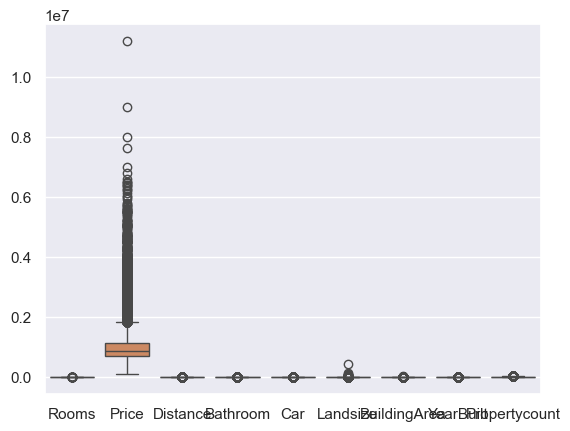

In [257]:
# Detecting the outliers using boxplot
sns.boxplot(
    dataset[
        [
            "Rooms",
            "Price",
            "Distance",
            "Bathroom",
            "Car",
            "Landsize",
            "BuildingArea",
            "YearBuilt",
            "Propertycount",
        ]
    ]
)

As you can see on the descriptive statistics and the boxplot above, there are several things that seems too odd, such as the outlier on `Price` and `Landsize`. However, it will makes sense if a house have zero landsize and I will assume it as "Zero-lot-line" homes, but it will not make sense if a house have a '0' `BuildingArea`. Thus, I will remove any house with '0' `BuildingArea`. Other than that, the maximum of `YearBuilt` is '2106', this issue is not make sense at all. Thus, we will remove all of the observations that is '> 2023' from `YearBuilt`

What about the `Price` column? Let's investigate it first before we remove these outliers

In [258]:
dataset['house_age'] = 2023 - dataset['YearBuilt']
dataset['house_age'].mean()

55.101356972774475

In [259]:
dataset['Price'].max()

11200000.0

In [260]:
dataset[dataset['Price'] == 11200000]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,house_age
25635,Brighton,6 Cole St,4,h,11200000.0,VB,hockingstuart,2017-10-28,10.5,3186.0,...,2.0,1400.0,136.0,1970.0,Bayside City Council,-37.89335,144.98643,Southern Metropolitan,10579.0,53.0


After several research, `Price` outliers will be still involved in this analysis since there are several factors to determine the house price, such as the `Suburb` is one of the main factors why the price of a house has so many outliers. Thus we will drop all of the outliers in `BuildingArea` and `YearBuilt` more than '2023'

In [261]:
# Finding the "Bad" data, which is the BuildingArea with 0 value
dataset[dataset['BuildingArea'] == 0]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,house_age
7211,North Melbourne,19 Shands La,2,t,841000.0,S,Jellis,2017-03-04,2.3,3051.0,...,1.0,215.0,0.0,2000.0,Melbourne City Council,-37.79530,144.94370,Northern Metropolitan,6821.0,23.0
19775,Balwyn North,14 Wanbrow Av,5,h,1950000.0,S,RT,2017-09-03,9.7,3104.0,...,2.0,743.0,0.0,1949.0,Boroondara City Council,-37.80235,145.09311,Southern Metropolitan,7809.0,74.0
19840,Bundoora,22 Moreton Cr,3,h,814000.0,S,Barry,2017-09-03,12.1,3083.0,...,2.0,542.0,0.0,1970.0,Banyule City Council,-37.70861,145.05691,Northern Metropolitan,10175.0,53.0
20038,Heidelberg Heights,8 Thames St,3,h,870000.0,SN,Miles,2017-09-03,8.8,3081.0,...,2.0,658.0,0.0,1920.0,Banyule City Council,-37.75287,145.05547,Eastern Metropolitan,2947.0,103.0
20223,Roxburgh Park,16 Sandover Dr,4,h,570000.0,S,Raine,2017-09-03,20.6,3064.0,...,2.0,504.0,0.0,2000.0,Hume City Council,-37.61419,144.93448,Northern Metropolitan,5833.0,23.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32936,Wollert,42 Rhone Dr,4,h,722500.0,S,LJH,2018-02-17,25.5,3750.0,...,2.0,512.0,0.0,1970.0,Whittlesea City Council,-37.61971,145.02910,Northern Metropolitan,2940.0,53.0
33397,Greenvale,26 Perugia Av,4,h,677000.0,S,Ray,2018-03-17,20.4,3059.0,...,2.0,312.0,0.0,2013.0,Hume City Council,-37.62439,144.88629,Northern Metropolitan,4864.0,10.0
33660,Preston,91 Dundas St,3,h,950000.0,PI,Spencer,2018-03-17,8.4,3072.0,...,0.0,301.0,0.0,1935.0,Darebin City Council,-37.75302,145.00948,Northern Metropolitan,14577.0,88.0
33899,Wollert,40 Whitebark St,4,h,615000.0,S,HAR,2018-03-17,25.5,3750.0,...,2.0,392.0,0.0,2015.0,Whittlesea City Council,-37.61252,145.04288,Northern Metropolitan,2940.0,8.0


In [262]:
# Finding the outlier of YearBuilt
dataset[dataset['YearBuilt'] >= 2023]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,house_age
2453,Bulleen,3 Maringa St,4,h,870000.0,SP,Ray,2016-11-07,11.8,3105.0,...,2.0,729.0,255.0,2106.0,Manningham City Council,-37.7637,145.0881,Eastern Metropolitan,4480.0,-83.0


In [263]:
# Taking out of these outliers
dataset = dataset[dataset['YearBuilt'] <= 2023]
dataset = dataset[dataset['BuildingArea'] != 0]

# Descriptive Statistics of dataset
dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Rooms,34780.0,3.030276e+00,0.969934,1.00000,2.000000,3.00000,4.000000e+00,1.600000e+01
Price,34780.0,1.010800e+06,571944.445856,85000.00000,695000.000000,870000.00000,1.150000e+06,1.120000e+07
Distance,34779.0,1.118047e+01,6.785655,0.00000,6.400000,10.30000,1.400000e+01,4.810000e+01
Bathroom,34780.0,1.713427e+00,0.652838,0.00000,1.000000,2.00000,2.000000e+00,1.200000e+01
Car,34780.0,1.294940e+00,1.151915,0.00000,0.000000,1.00000,2.000000e+00,2.600000e+01
Landsize,34780.0,5.689619e+02,2766.825363,0.00000,357.000000,521.00000,5.980000e+02,4.330140e+05
BuildingArea,34780.0,1.458778e+02,252.409116,0.01000,136.000000,136.00000,1.360000e+02,4.451500e+04
YearBuilt,34780.0,1.967883e+03,25.012505,1196.00000,1970.000000,1970.00000,1.970000e+03,2.019000e+03
Lattitude,34780.0,-2.913966e+01,15.896038,-38.19043,-37.846882,-37.77651,-3.763459e+01,0.000000e+00
Longtitude,34780.0,1.117490e+02,60.959746,0.00000,144.723675,144.97390,1.450517e+02,1.455264e+02


## Feature Selection

In [264]:
# Removing unnecessary features
dataset.drop(columns=['Address', 'Propertycount', 'house_age'], inplace=True)
dataset.head(10)

,Suburb,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname
0,Abbotsford,2,h,870000.0,SS,Jellis,2016-09-03,2.5,3067.0,1.0,1.0,126.0,136.0,1970.0,Yarra City Council,-37.8014,144.9958,Northern Metropolitan
1,Abbotsford,2,h,1480000.0,S,Biggin,2016-12-03,2.5,3067.0,1.0,1.0,202.0,136.0,1970.0,Yarra City Council,-37.7996,144.9984,Northern Metropolitan
2,Abbotsford,2,h,1035000.0,S,Biggin,2016-02-04,2.5,3067.0,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan
3,Abbotsford,3,u,870000.0,VB,Rounds,2016-02-04,2.5,3067.0,2.0,1.0,0.0,136.0,1970.0,Yarra City Council,-37.8114,145.0116,Northern Metropolitan
4,Abbotsford,3,h,1465000.0,SP,Biggin,2017-03-04,2.5,3067.0,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan
5,Abbotsford,3,h,850000.0,PI,Biggin,2017-03-04,2.5,3067.0,2.0,1.0,94.0,136.0,1970.0,Yarra City Council,-37.7969,144.9969,Northern Metropolitan
6,Abbotsford,4,h,1600000.0,VB,Nelson,2016-06-04,2.5,3067.0,1.0,2.0,120.0,142.0,2014.0,Yarra City Council,-37.8072,144.9941,Northern Metropolitan
7,Abbotsford,4,h,870000.0,SN,Nelson,2016-08-06,2.5,3067.0,2.0,2.0,400.0,220.0,2006.0,Yarra City Council,-37.7965,144.9965,Northern Metropolitan
8,Abbotsford,2,h,870000.0,S,Biggin,2016-08-06,2.5,3067.0,1.0,2.0,201.0,136.0,1900.0,Yarra City Council,-37.7995,144.9974,Northern Metropolitan
9,Abbotsford,2,h,870000.0,S,Collins,2016-08-06,2.5,3067.0,2.0,1.0,202.0,136.0,1900.0,Yarra City Council,-37.7996,144.9989,Northern Metropolitan


In [265]:
# Confirming the total amount of columns used now
dataset.shape

(34780, 18)

### Storing the new dataset

In [266]:
dataset.to_csv("MELBOURNE_CLEANED_DATASET.csv")

## Target Variable Distribution

Since we want to conduct a **Multiple Linear Regression Analysis**, I will use these target variables (Dependent Variable) to predict the ROI of a house
- Price
- Date
- YearBuilt

However, I want to find the relationships between the variables in this dataset using `sns.pairplot`

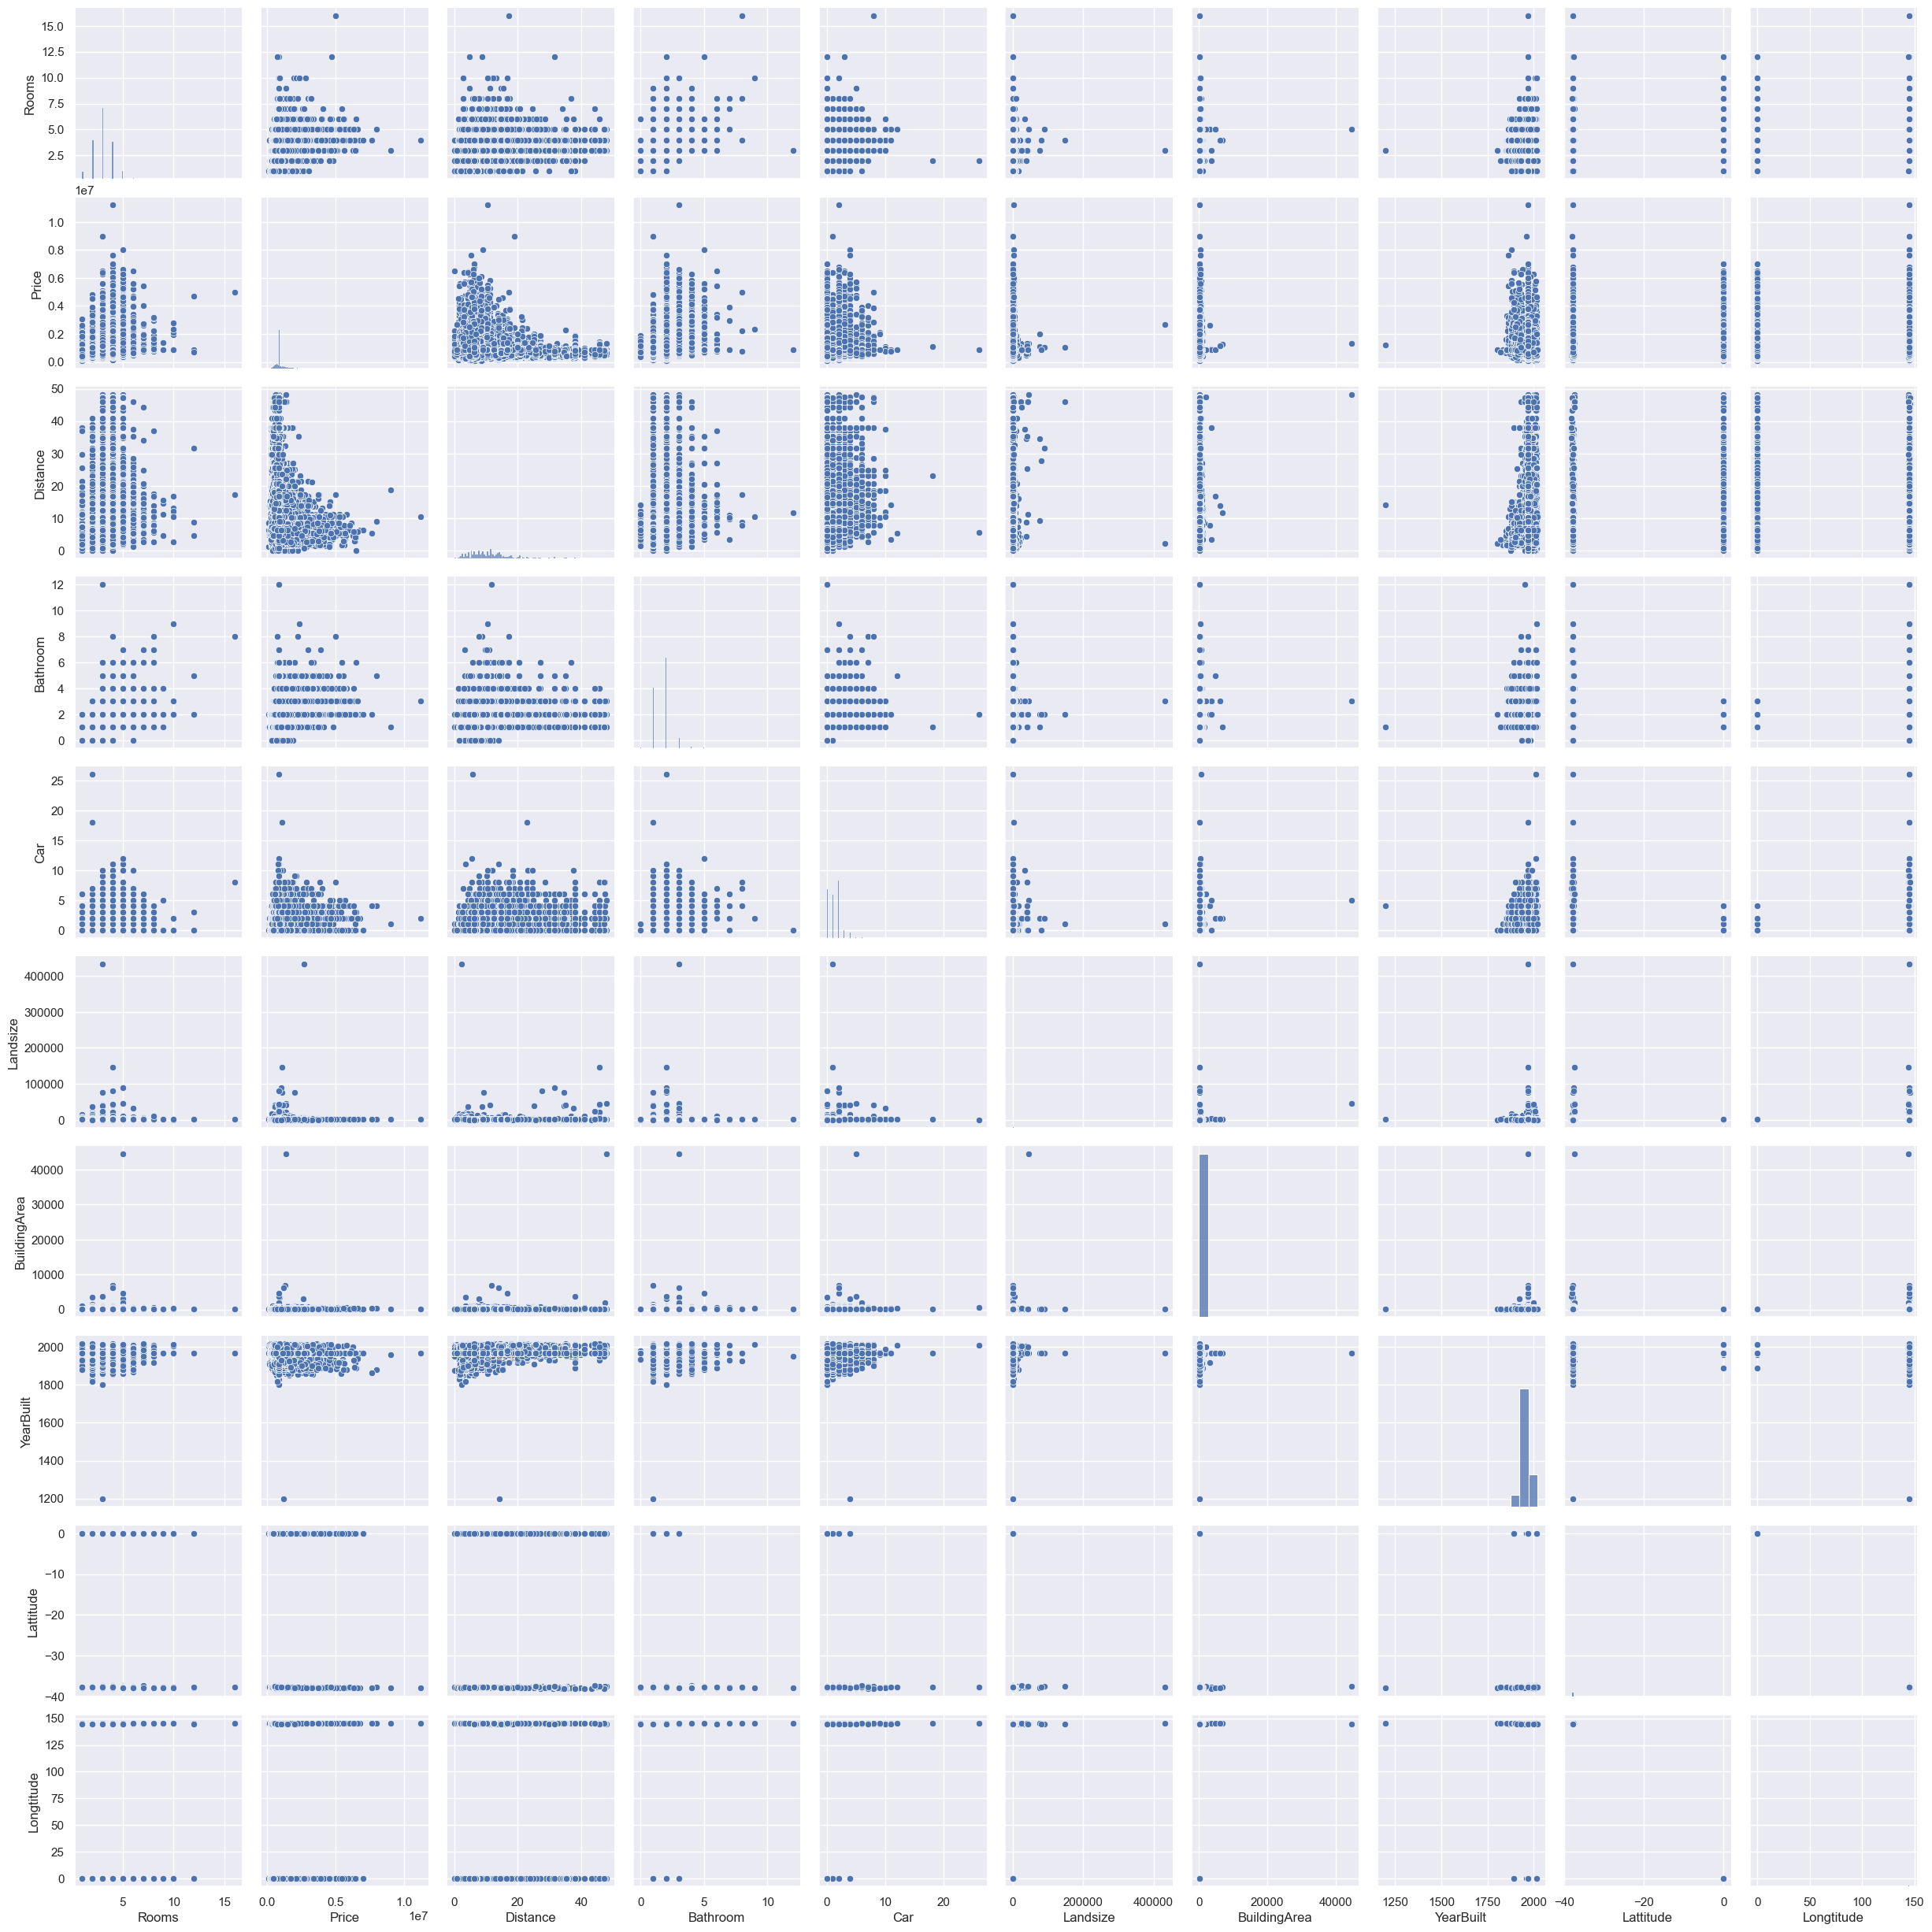

In [267]:
# Relationships between variables
sns.pairplot(dataset)